In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

##### 1470 satır ve 35  sütünlu verimiz var.

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

print("Veri Setı Boyutu:", df.shape)
df.head()

Veri Setı Boyutu: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("Veri Seti Bilgleri\n")
df.info()

print("\nSayısal Değişkenler")
stats_summary = df.describe().T # Büyük oldığudna atama ile gözüküyor görüntüsü bu yüzen farklı
print(stats_summary)

print("\nKategorik Değişkenler")
df.describe(include=['object']).T

Veri Seti Bilgleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobL

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


## 1.2 Hedef Değişken Analizi (Attrition)

###### Dengesiz veri setimiz var %83,9 No Attrition ve %16.1 Attration

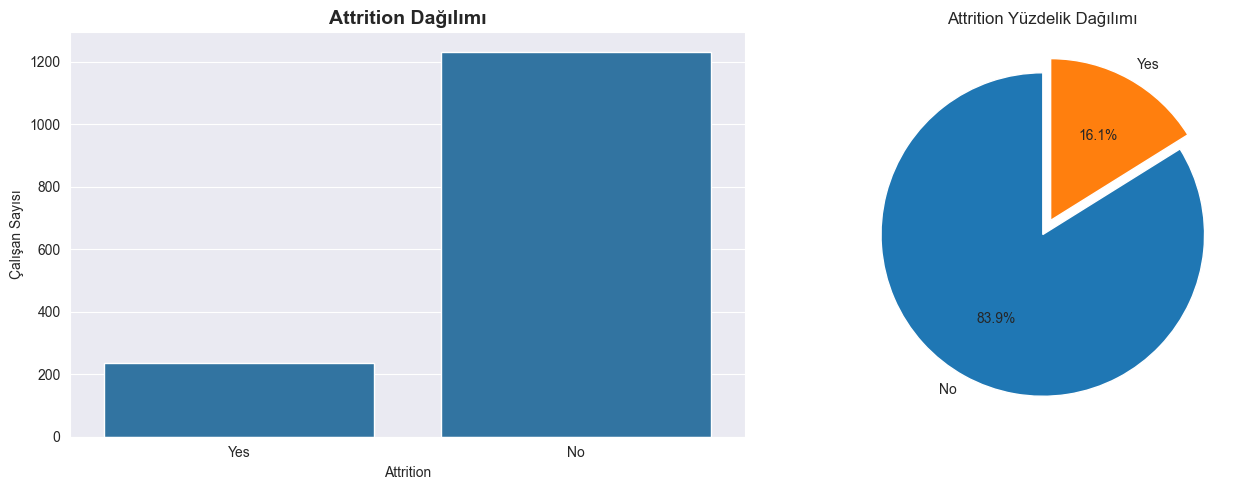

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) #grafik ayaları 

# Count plot
sns.countplot(data=df, x='Attrition', ax=axes[0]) # count plot grafigi
axes[0].set_title('Attrition Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Çalışan Sayısı')

# Pasta grafiği
attrition_counts = df['Attrition'].value_counts()
axes[1].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
            startangle=90, explode=(0, 0.1))
axes[1].set_title('Attrition Yüzdelik Dağılımı')

plt.tight_layout()
plt.show()

## 1.3 Eksik Değer Analizi

###### Nan değeri bulunmamakta

In [5]:
# Eksik değer kontrolü
print("Eksik Değer Analizi:")
missing = df.isnull().sum() # null değerleri topla ve göster
print(missing)

Eksik Değer Analizi:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole 

## 1.4 Sayısal Değişkenlerin Analizi

In [6]:
# Sayısal degişkenlei belirleme
numerical_cols = df.select_dtypes(include=['int64']).columns.tolist() #Tüm değerlerim int64 olduğunda intl64 şeklinde ayarladım floart64 de eklenebilir 
print(f"Toplam sayısal degisken: {len(numerical_cols)}")

print("\nAttrition'a Göre Sayısal Değişken Ortalamaları")

numerical_comparison = df.groupby('Attrition')[numerical_cols[:27]].mean().T # ilk 10 colum'a gçre gruplama 
numerical_comparison['Fark'] = numerical_comparison['Yes'] - numerical_comparison['No'] #aralarındaki farkı görmek için 
print(numerical_comparison.sort_values('Fark', ascending=False)) # aralarındaki fark'a göre sıralama


Toplam sayısal degisken: 26

Attrition'a Göre Sayısal Değişken Ortalamaları
Attrition                           No           Yes         Fark
MonthlyRate               14265.779400  14559.308017   293.528617
DistanceFromHome              8.915653     10.632911     1.717259
NumCompaniesWorked            2.645580      2.940928     0.295348
PerformanceRating             3.153285      3.156118     0.002833
StandardHours                80.000000     80.000000     0.000000
EmployeeCount                 1.000000      1.000000     0.000000
Education                     2.927007      2.839662    -0.087345
WorkLifeBalance               2.781022      2.658228    -0.122794
PercentSalaryHike            15.231144     15.097046    -0.134097
RelationshipSatisfaction      2.733982      2.599156    -0.134826
TrainingTimesLastYear         2.832928      2.624473    -0.208455
JobInvolvement                2.770479      2.518987    -0.251491
YearsSinceLastPromotion       2.234388      1.945148    -0.289240


######

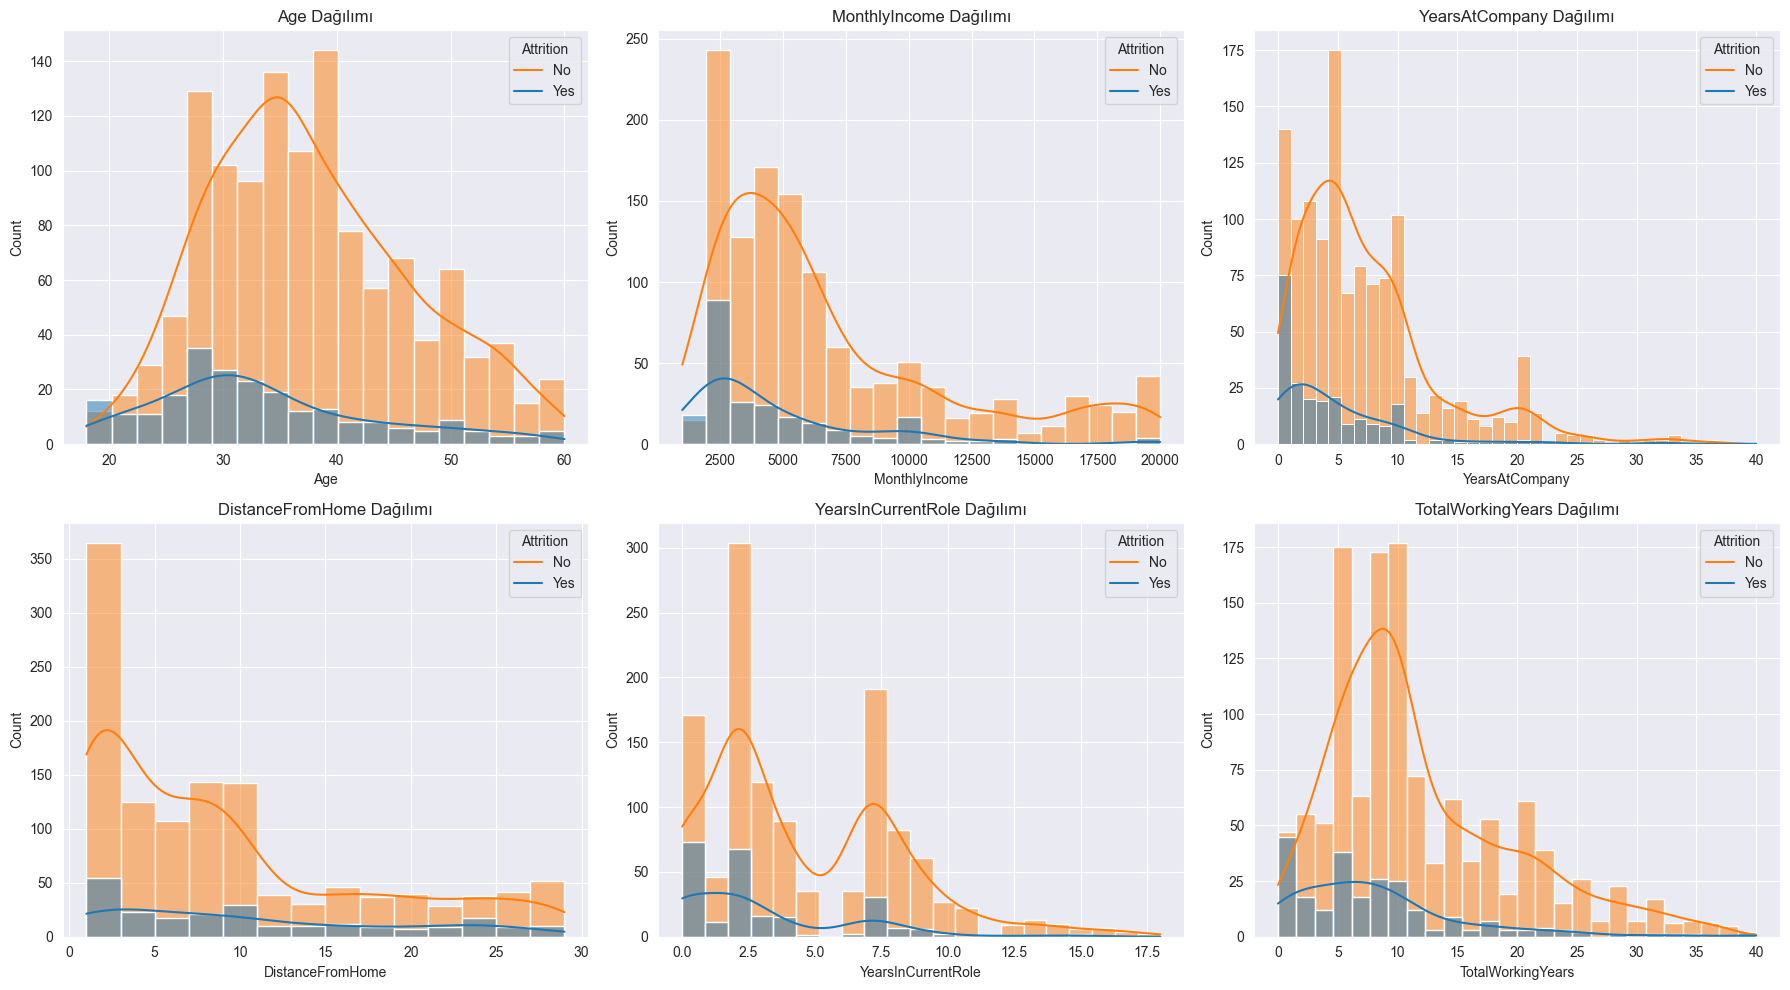

In [7]:
# Önemli sayısal değişkenlerin dağılımı
key_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 
                'YearsInCurrentRole', 'TotalWorkingYears']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    sns.histplot(data=df, x=col, hue='Attrition', kde=True, ax=axes[idx])# kde(yopunluk eğrisi, )
    axes[idx].set_title(f'{col} Dağılımı')
    axes[idx].legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


#####  1.**Genç çalışanlar daha yüksek risk grubundadır**
##### 2.**Düşük gelir, çalışanı elde tutma açısından önemli bir risk faktörüdür.**
##### 3.**İlk yılları geçmiş çalışanlarda ayılma riski ciddi şekilde azalır**
##### 4.**evdden uzaklık, ayrılmayı anlamada zayıf bir etyike sahiptir**
##### 5.**Az deneyimli veya kariyerinin başındaki çalışanlarda risk daha fazladır.**

## 1.5 Kategorik Değişkenlerin Analizi

In [8]:
# Kategorik degikenleri belirleme
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Attrition')  # Hedef değişkeni çıkarıyoruz

print(f"Toplam kategorik değişken: {len(categorical_cols)} ")
print(categorical_cols)

print("\nKategorik Değişkenlere Göre Attrition Oranları:")
for col in categorical_cols[:8]: 
    #Her gruptaki attrition oranının yüzde olarak hesaplanması.
    attrition_rate = df.groupby(col)['Attrition'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(f"\n{attrition_rate.sort_values(ascending=False)}")



Toplam kategorik değişken: 8 
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Kategorik Değişkenlere Göre Attrition Oranları:

BusinessTravel
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Non-Travel            8.000000
Name: Attrition, dtype: float64

Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

EducationField
Human Resources     25.925926
Technical Degree    24.242424
Marketing           22.012579
Life Sciences       14.686469
Medical             13.577586
Other               13.414634
Name: Attrition, dtype: float64

Gender
Male      17.006803
Female    14.795918
Name: Attrition, dtype: float64

JobRole
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manuf

##### Kategorik değişkenler ile attrationın aralarındaki bağın grafikte incelenmesi

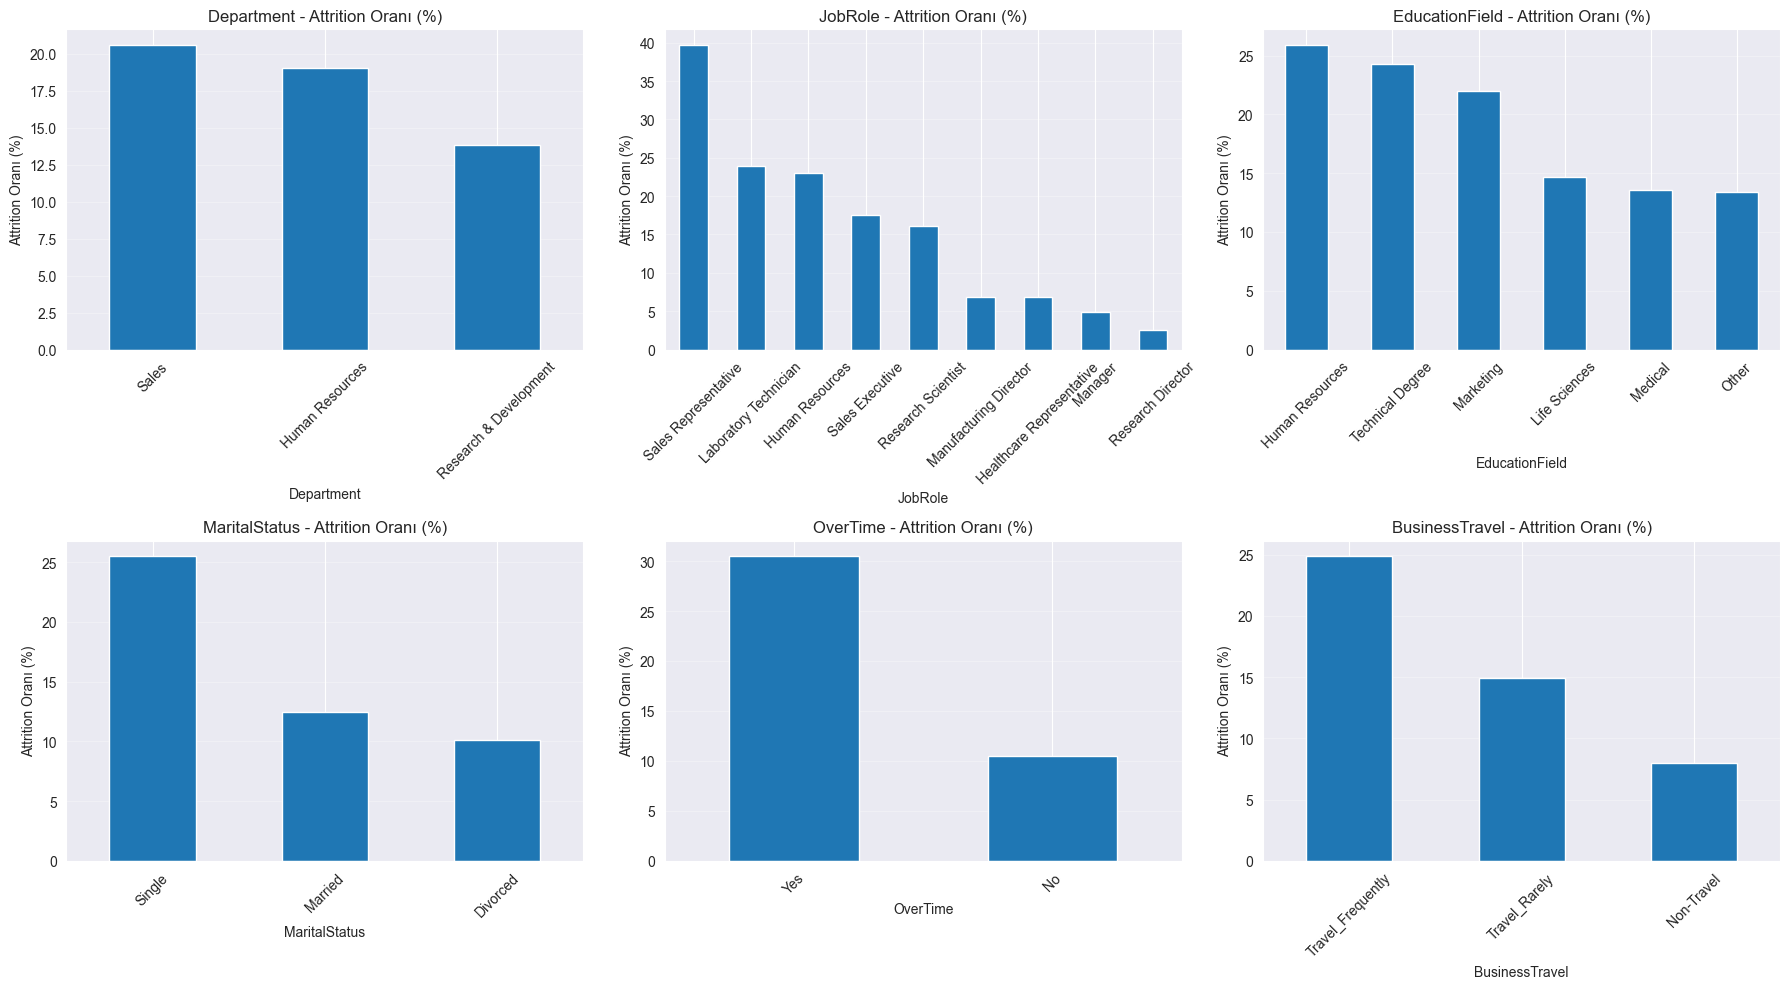

In [9]:
# Kategorik değişkenlerin görselleştirilmesi
key_categorical = ['Department', 'JobRole', 'EducationField', 'MaritalStatus', 
                   'OverTime', 'BusinessTravel']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    # Attrition oranını hesaplama ve sıralaması
    attrition_pct = df.groupby(col)['Attrition'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).sort_values(ascending=False)
    
    attrition_pct.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col} - Attrition Oranı (%)')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Attrition Oranı (%)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 1.6 Korelasyon Analizi

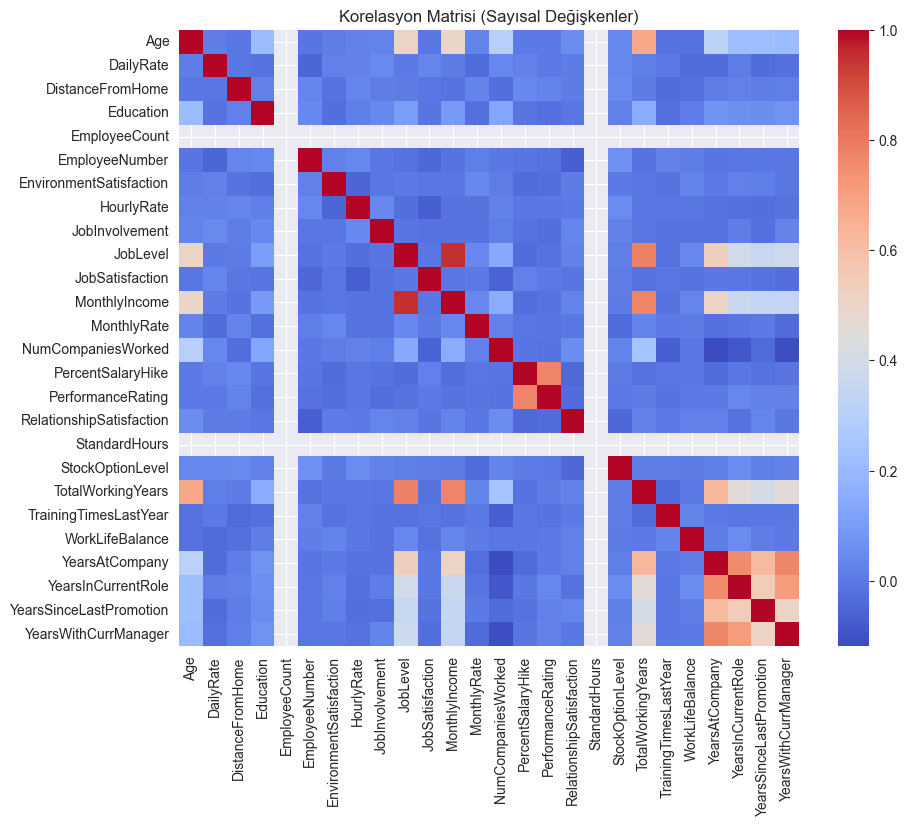

In [10]:

df['Attrition_Binary'] = (df['Attrition'] == 'Yes').astype(int) 
# Korelasyon matrisi
corr_matrix = df[numerical_cols].corr()

# Korelasyon ısı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Korelasyon Matrisi')
plt.show()


In [13]:
df['Attrition_Binary'] = (df['Attrition'] == 'Yes').astype(int) 

correlations_with_target = []
for col in numerical_cols:
    if col != 'Attrition_Binary':
        corr, p_value = stats.pointbiserialr(df['Attrition_Binary'], df[col])
        correlations_with_target.append({
            'Özellik': col,
            'Korelasyon': corr,
            'P-Value': p_value,
            'Anlamlı': 'Evet' if p_value < 0.05 else 'Hayır'
        })

corr_target_df = pd.DataFrame(correlations_with_target)
corr_target_df = corr_target_df.sort_values('Korelasyon', key=abs, ascending=False)
print(corr_target_df.head(15))

drop_cols = [
    'DailyRate', 'HourlyRate', 'MonthlyRate',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'PercentSalaryHike',  'RelationshipSatisfaction','EducationField','JobRole'

                    Özellik  Korelasyon       P-Value Anlamlı
19        TotalWorkingYears   -0.171063  4.061878e-11    Evet
9                  JobLevel   -0.169105  6.795385e-11    Evet
23       YearsInCurrentRole   -0.160545  6.003186e-10    Evet
11            MonthlyIncome   -0.159840  7.147364e-10    Evet
0                       Age   -0.159205  8.356308e-10    Evet
25     YearsWithCurrManager   -0.156199  1.736987e-09    Evet
18         StockOptionLevel   -0.137145  1.301015e-07    Evet
22           YearsAtCompany   -0.134392  2.318872e-07    Evet
8            JobInvolvement   -0.130016  5.677065e-07    Evet
10          JobSatisfaction   -0.103481  7.043067e-05    Evet
6   EnvironmentSatisfaction   -0.103369  7.172339e-05    Evet
2          DistanceFromHome    0.077924  2.793060e-03    Evet
21          WorkLifeBalance   -0.063939  1.421105e-02    Evet
20    TrainingTimesLastYear   -0.059478  2.257850e-02    Evet
1                 DailyRate   -0.056652  2.985816e-02    Evet


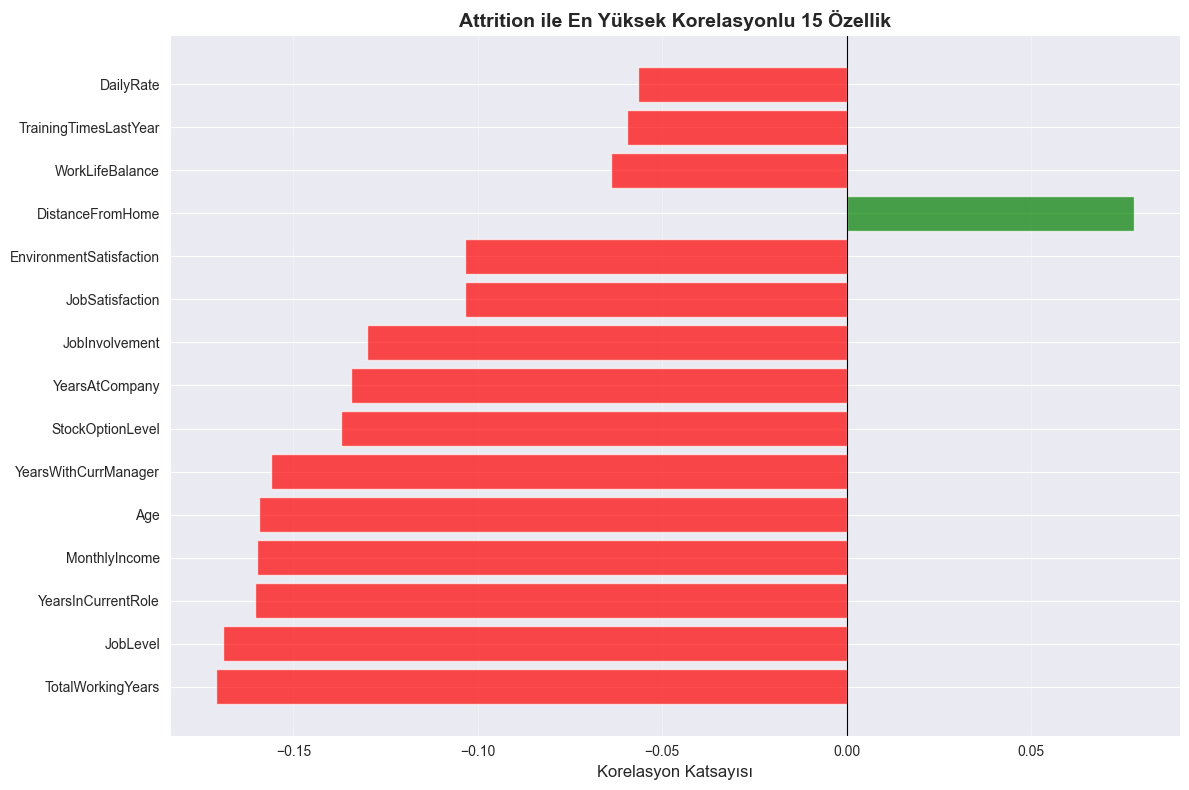

In [12]:
plt.figure(figsize=(12, 8))
top_15 = corr_target_df.head(15)
colors = ['green' if x > 0 else 'red' for x in top_15['Korelasyon']]
plt.barh(top_15['Özellik'], top_15['Korelasyon'], color=colors, alpha=0.7)
plt.xlabel('Korelasyon Katsayısı', fontsize=12)
plt.title('Attrition ile En Yüksek Korelasyonlu 15 Özellik', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()